<a href="https://colab.research.google.com/github/Debanjana-github/EDA-with-python/blob/main/Sample_Superstore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explanatory Data Analysis on 'Sample Superstore'

Objective:Try to find out the weak areas where you can work to make more profit. And try to find out the another bussiness problen by EDA.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df=df.drop(['Postal Code'],axis=1)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
object_columns=[]
for col in df.columns:
  if df[col].dtype=='object':
    object_columns.append(col)
print ("The set of object type columns are:",object_columns)

The set of object type columns are: ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [ ]:
if (df['Profit'] < 0).any():
    print('There are negative values in the column')
else:
    print('There are no negative values in the column')

There are negative values in the column


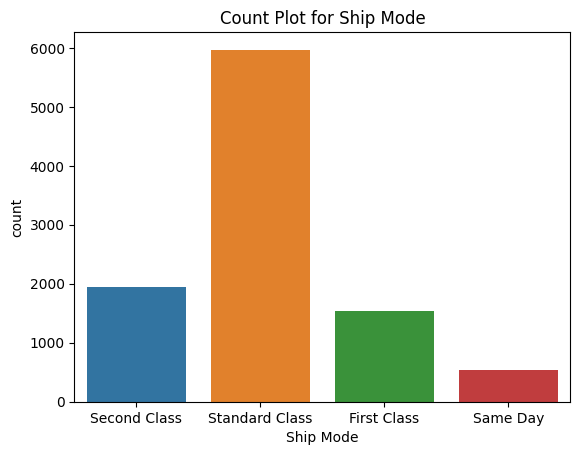

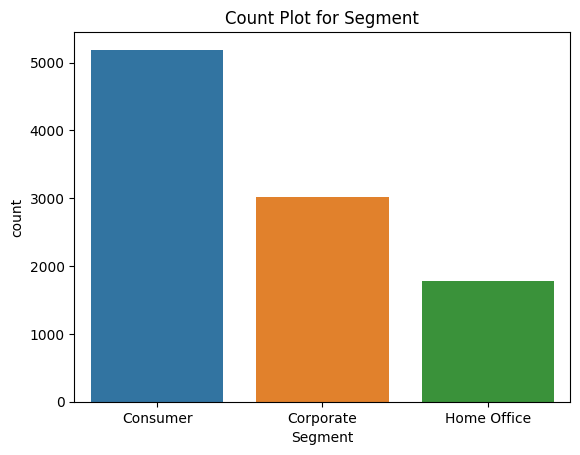

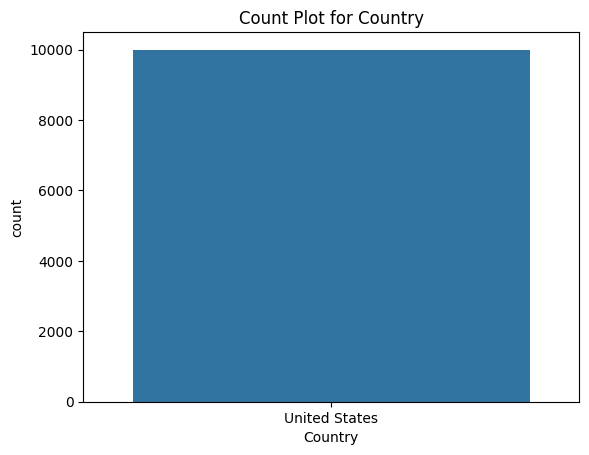

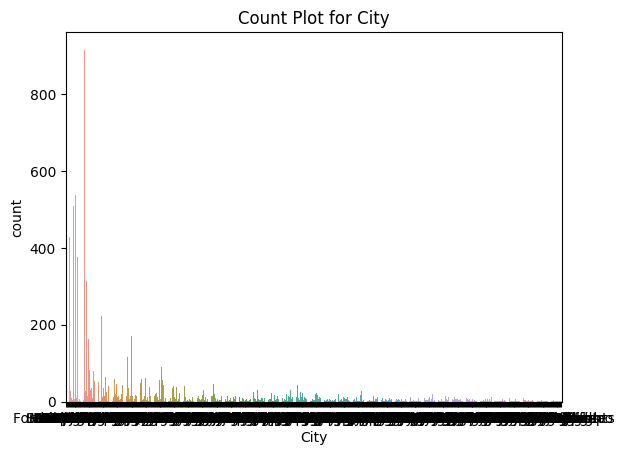

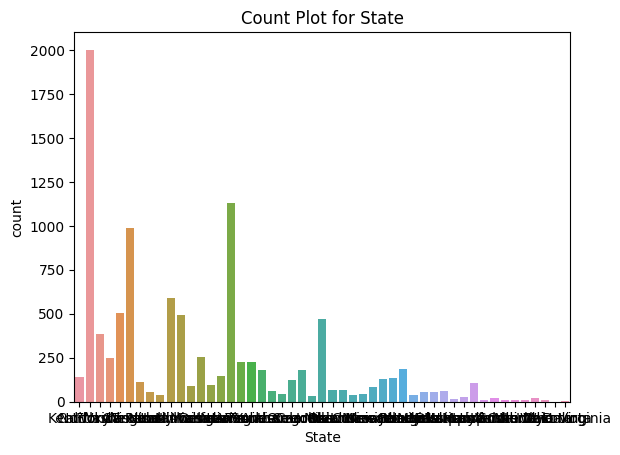

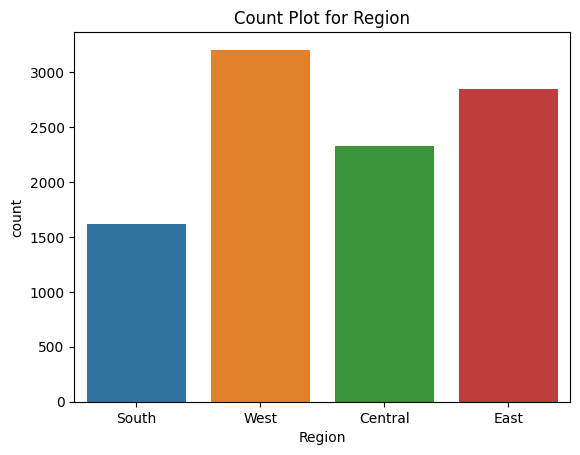

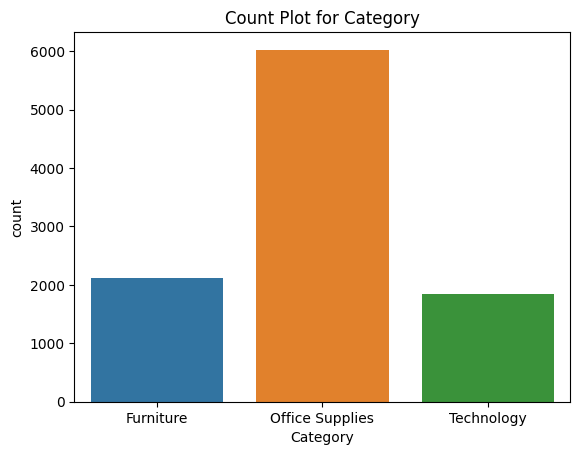

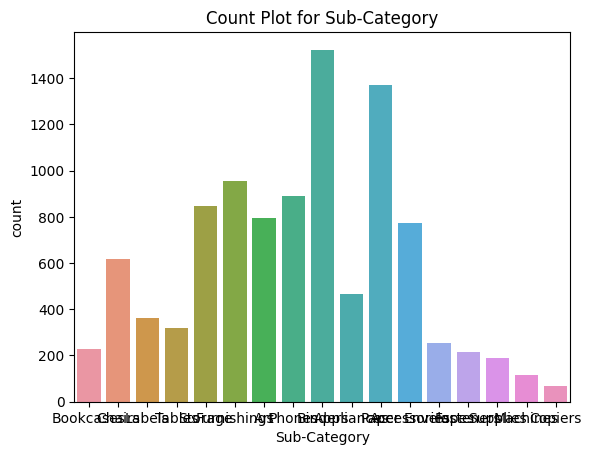

In [ ]:
colunas = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for category in colunas:
    sns.countplot(x=category, data=df)  
    plt.title(f"Count Plot for {category}")
    plt.show()

SCATTER PLOT

Coloring scatter plots by categorical variable will greatly enhance the scatter plot.

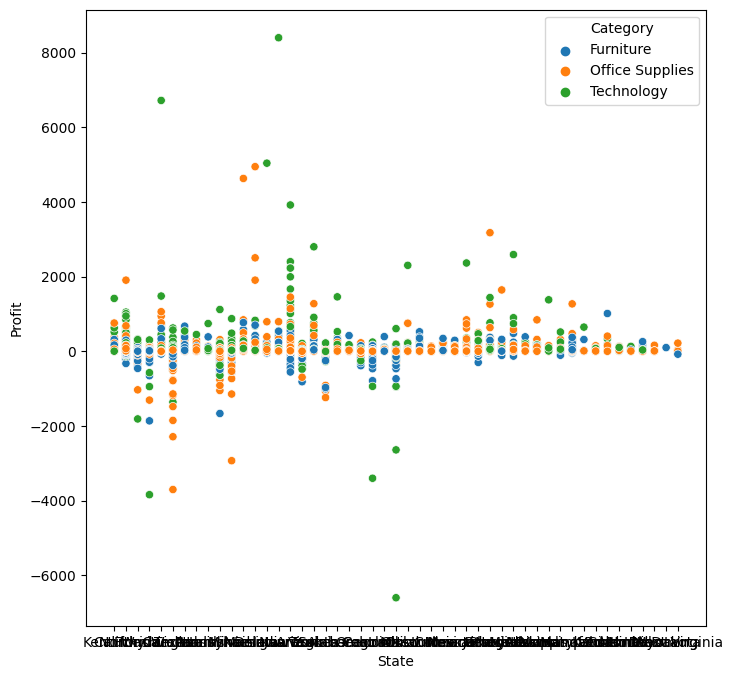

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(y='Profit',x='State',data=df,hue='Category')
plt.show()

From the above scatter diagram, we can see that the maximum 'furniture' profit lies under the 'technology and office supplies'. The maximum profit of 'Furniture' lies between 0-1000. Approximately we can see that maximum profit comes from 'Technology' and then 'Office Supplies'.

For better approximation we go to some mathematical calculation.

<Axes: xlabel='State'>

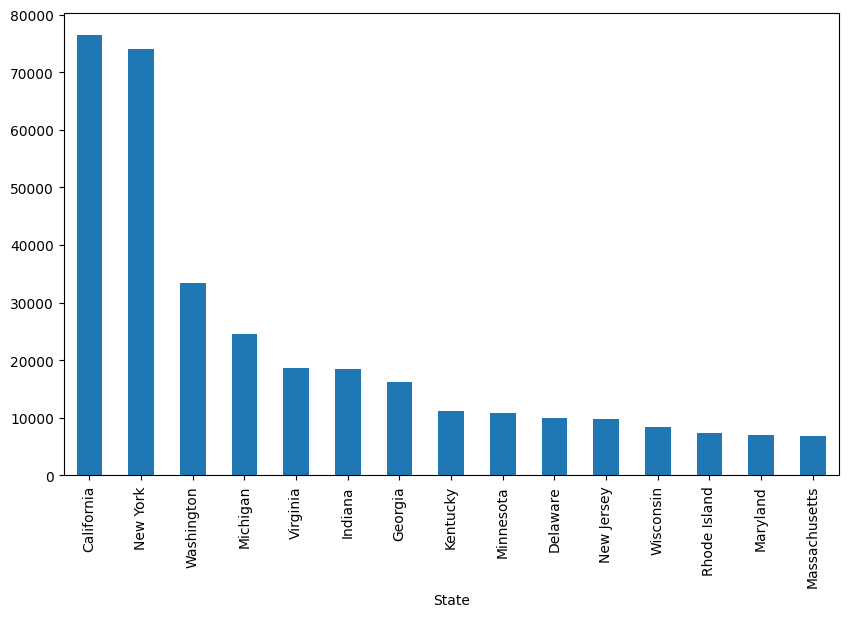

In [ ]:
profits_high=df.groupby(["State"])["Profit"].sum().nlargest(15)

plt.figure(figsize=(10,6))
profits_high.plot.bar()

From the above bar diagram we can see that, 'California' state gain more profit. Also say that average profit is approximately 20,000 Rs.

<Axes: xlabel='State'>

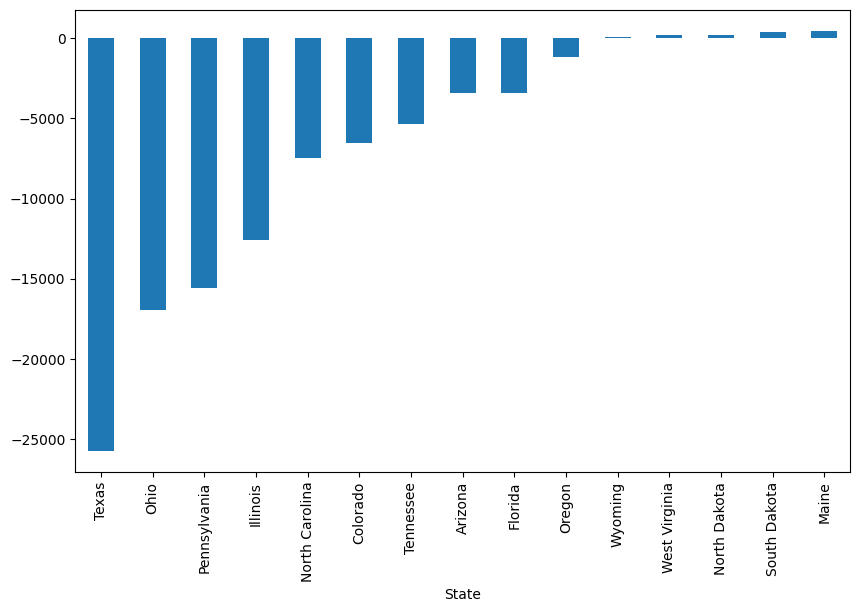

In [ ]:
profits_low=df.groupby(["State"])["Profit"].sum().nsmallest(15)

plt.figure(figsize=(10,6))
profits_low.plot.bar()

From the above bar diagram we can see that, 'Texas' state loss a lot amount of money.

Text(0, 0.5, 'Sales')

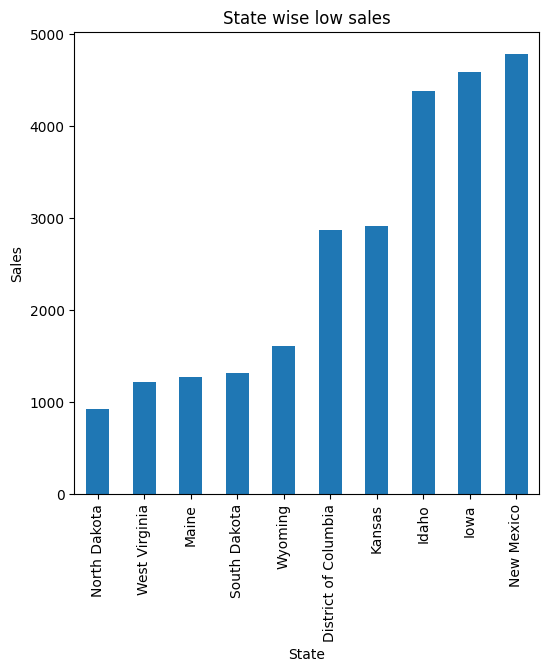

In [ ]:
state_sales=df.groupby(["State"])["Sales"].sum().nsmallest(10)

plt.figure(figsize=(6,6))
state_sales.plot.bar()
plt.title("State wise low sales")
plt.ylabel("Sales")



Text(0, 0.5, 'Sales')

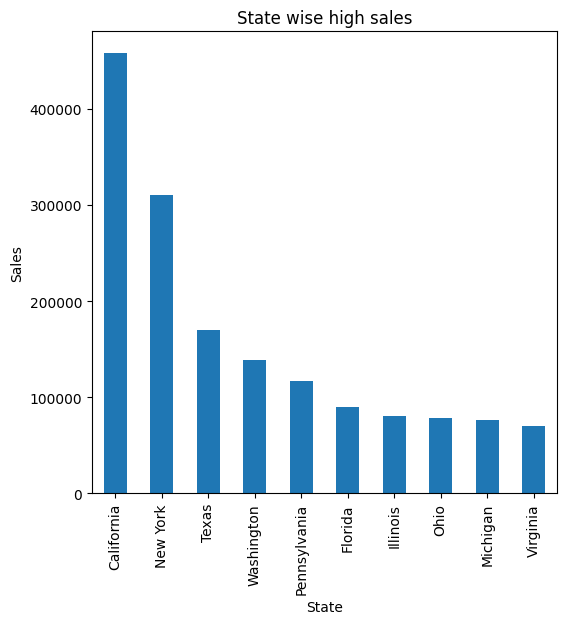

In [ ]:
state_sales_high=df.groupby(["State"])["Sales"].sum().nlargest(10)

plt.figure(figsize=(6,6))
state_sales_high.plot.bar()
plt.title("State wise high sales")
plt.ylabel("Sales")

'california' city has high sales amount and 'North Dakota' has low sales of amount.

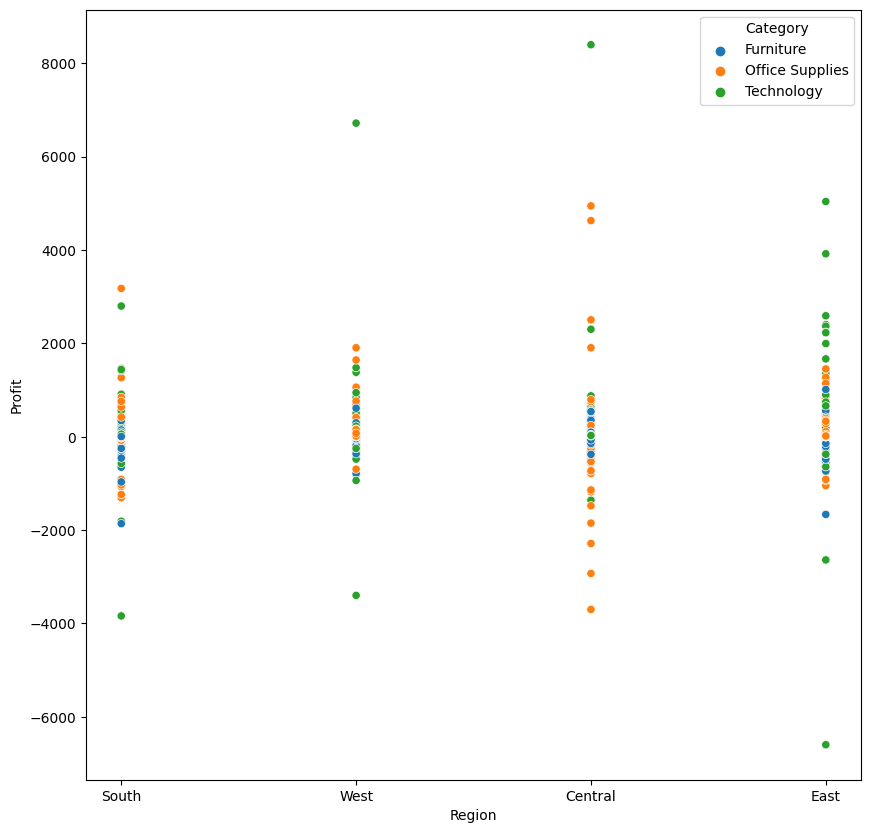

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Profit',x='Region',data=df,hue='Category')
plt.show()

From the above diagram we can say that, maximum profit gain from west, central and east region. Maximum blue point lies below green and orange points so we can say from 'Furniture' category we got low profit. Maximum profit gain from 'Technology' and 'office supplier'.

For better appriximation we can go for mathematical calculation.

Text(0, 0.5, 'Profit')

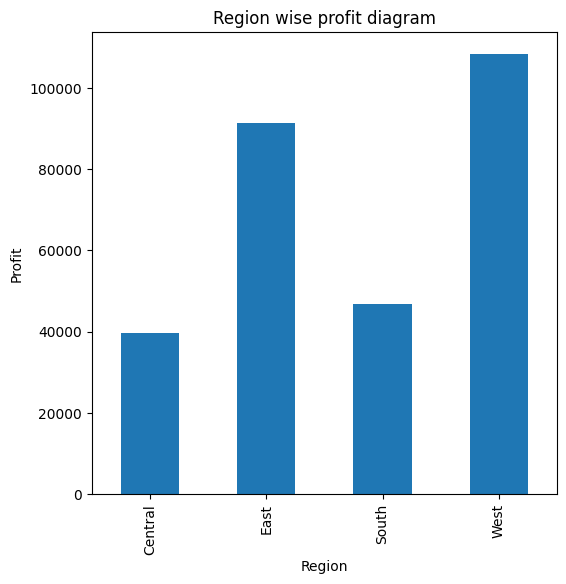

In [ ]:
region_profit=df.groupby(["Region"])["Profit"].sum()

plt.figure(figsize=(6,6))
region_profit.plot.bar()
plt.title("Region wise profit diagram")
plt.ylabel("Profit")

From the above diagram we can see that 'west' region make more profit than the other region.

Text(0, 0.5, 'Sales')

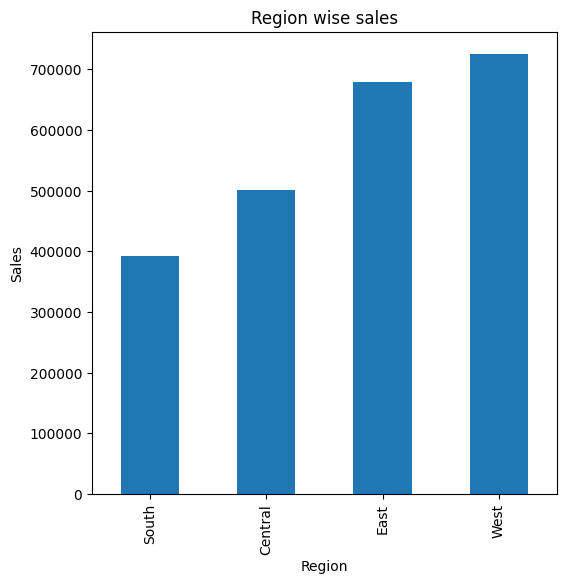

In [ ]:
region_sales=df.groupby(["Region"])["Sales"].sum().nsmallest(10)

plt.figure(figsize=(6,6))
region_sales.plot.bar()
plt.title("Region wise sales")
plt.ylabel("Sales")

<Axes: xlabel='Region'>

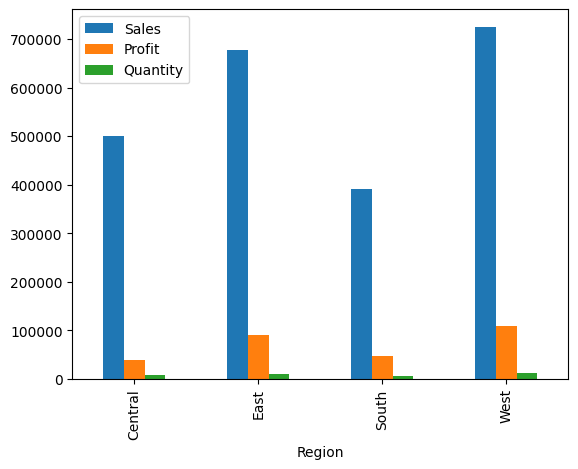

In [ ]:
category_analysis1 = pd.DataFrame(df.groupby(['Region'])[['Sales','Profit','Quantity']].sum())

category_analysis1.plot.bar()

From the above diagram we can say that 'west' region sales(near 70,000), and profit(near 20,000) maximum. In 'South' region sales(near 40,000) low but profit is greater than 'central' region.

In [ ]:
category_analysis2 = pd.DataFrame(df.groupby(['State'])[['Sales','Profit','Quantity']].sum())
category_analysis2

,Sales,Profit,Quantity
State,,,
Alabama,19510.6400,5786.8253,256
Arizona,35282.0010,-3427.9246,862
Arkansas,11678.1300,4008.6871,240
California,457687.6315,76381.3871,7667
Colorado,32108.1180,-6527.8579,693
Connecticut,13384.3570,3511.4918,281
Delaware,27451.0690,9977.3748,367
District of Columbia,2865.0200,1059.5893,40
Florida,89473.7080,-3399.3017,1379


From the above table show the state wise profit, sales and quantity.

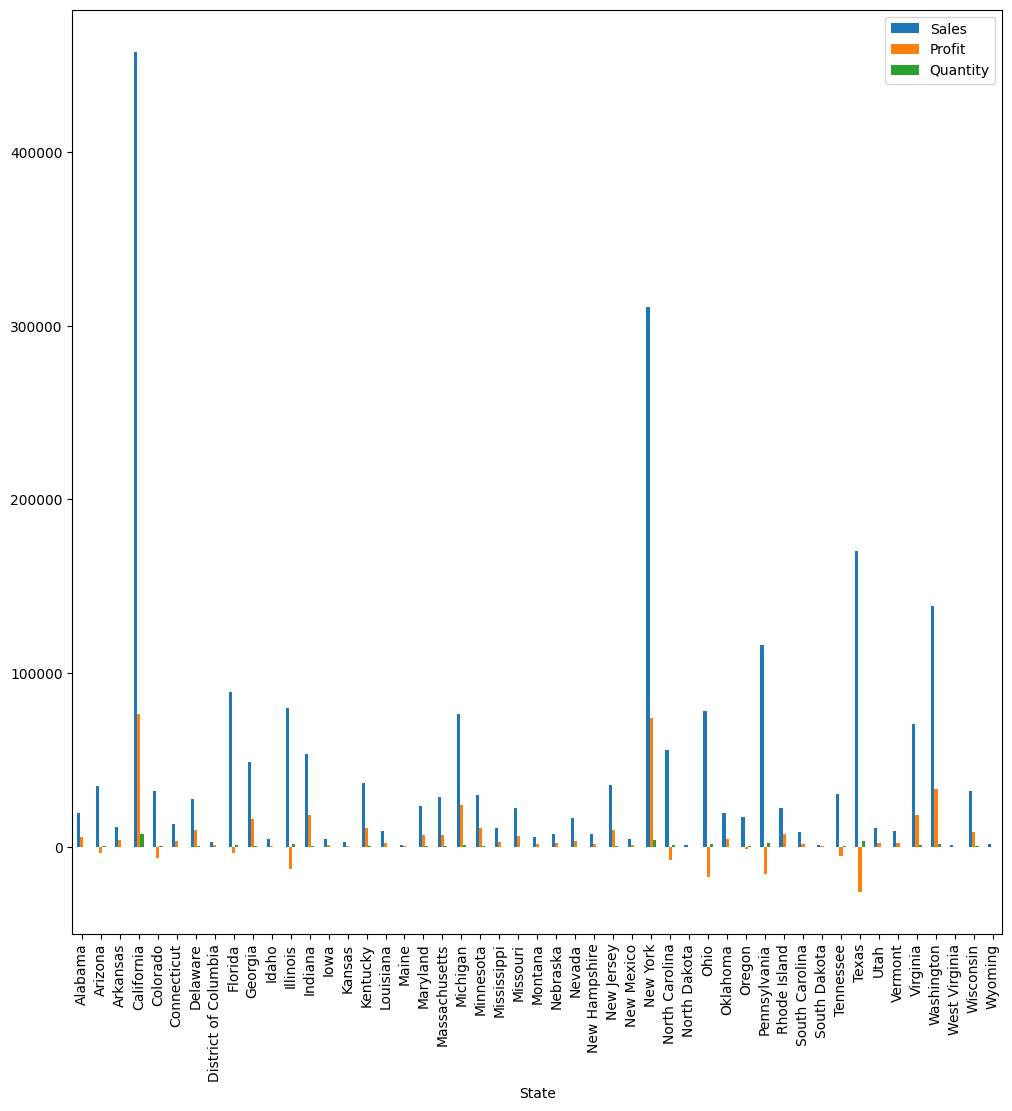

In [ ]:
category_analysis2.plot.bar(figsize=(12,12))
plt.show()

In [ ]:
cat1=df.groupby(['State', 'Region']).size().unstack()
cat1

Region,Central,East,South,West
State,,,,
Alabama,NaN,NaN,61.0,NaN
Arizona,NaN,NaN,NaN,224.0
Arkansas,NaN,NaN,60.0,NaN
California,NaN,NaN,NaN,2001.0
Colorado,NaN,NaN,NaN,182.0
Connecticut,NaN,82.0,NaN,NaN
Delaware,NaN,96.0,NaN,NaN
District of Columbia,NaN,10.0,NaN,NaN
Florida,NaN,NaN,383.0,NaN


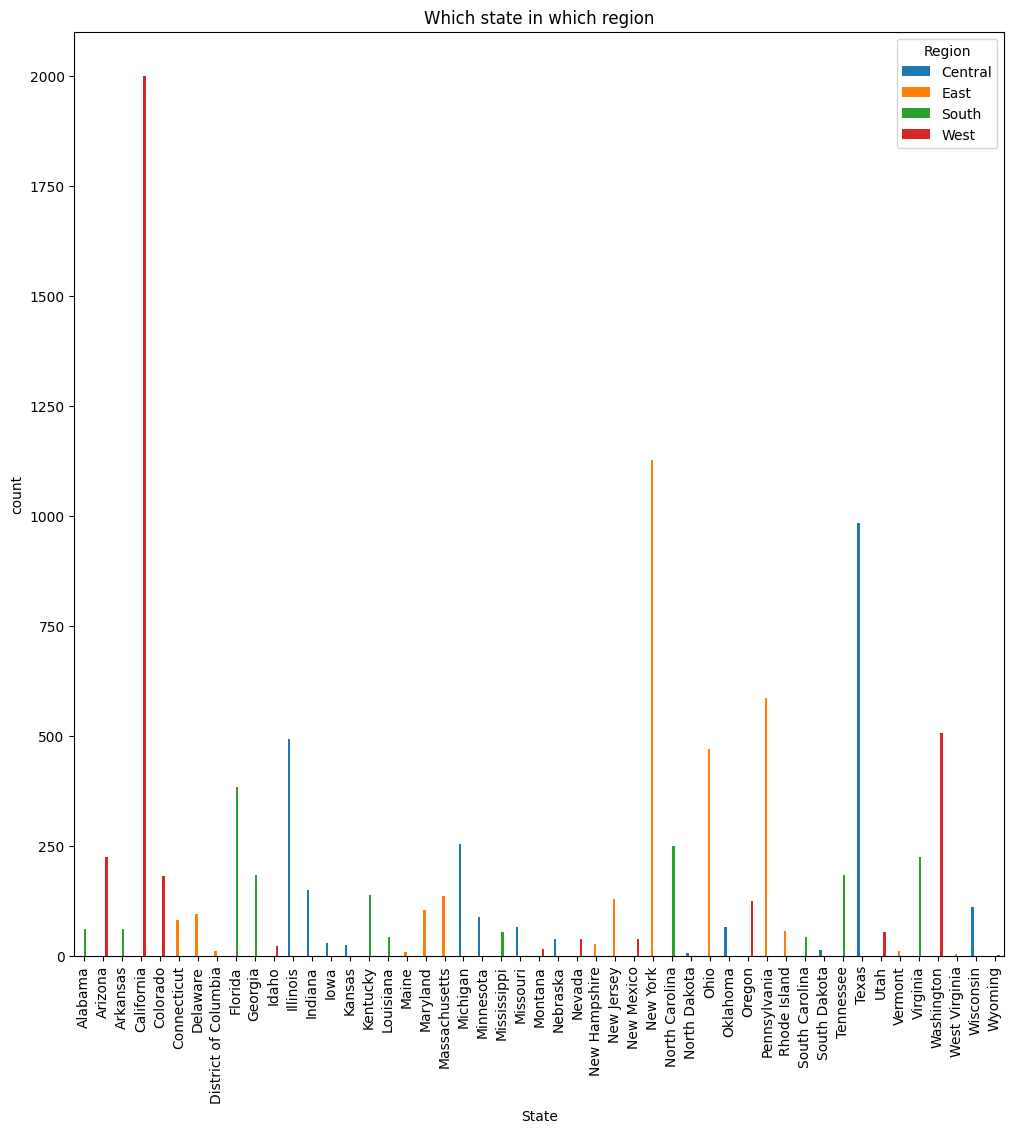

In [ ]:
cat1.plot.bar(figsize=(12,12))
plt.title("Which state in which region")
plt.ylabel("count")
plt.show()

From the above diagram we can say that maximum state come from west and east region so there profit margin is high than other region.

<ipython-input-59-4a0c1fb46e41>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="RdBu_r");


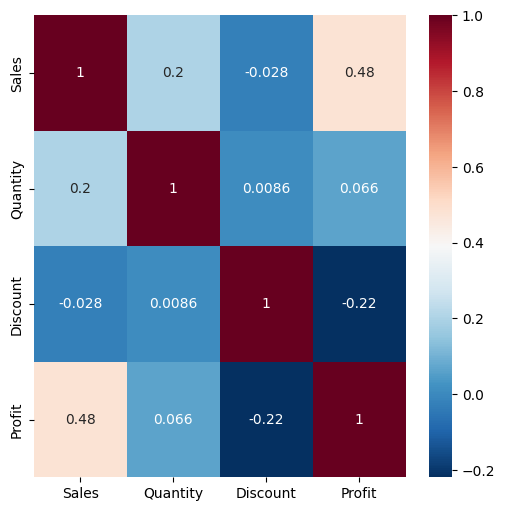

In [ ]:
# correlation matrix plot
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="RdBu_r");

From here we can see that profit and discount highly negatively correlated and sales and profit highly positively correlated(but not good).

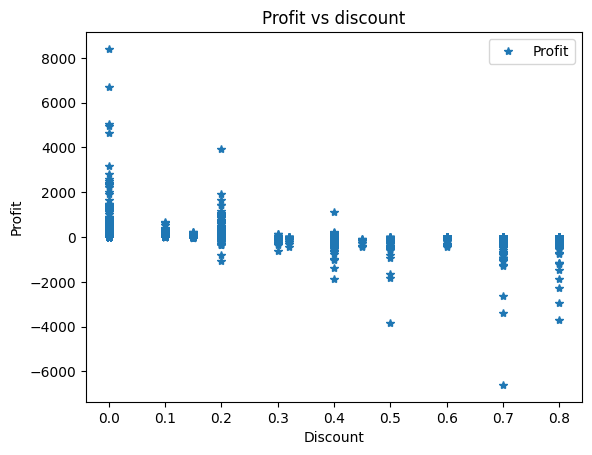

In [ ]:
df.plot(x="Discount",y="Profit",style='*')
plt.title("Profit vs discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


from the above diagram we can see that when discount increasing then profit decreasing , in general its a quiet normal situation.

Text(0, 0.5, 'Discount')

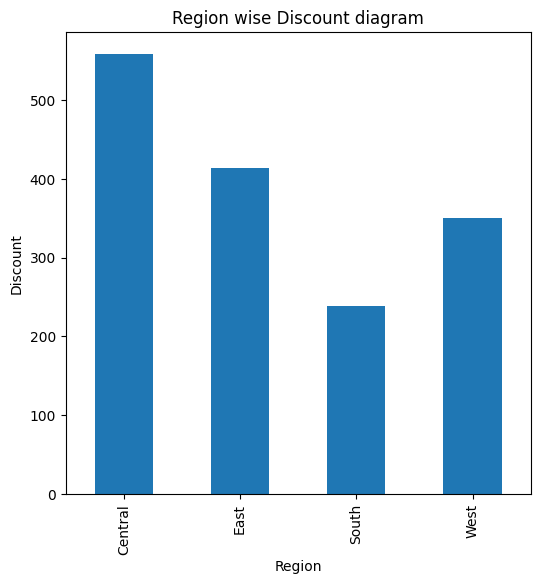

In [ ]:
region_Discount=df.groupby(["Region"])["Discount"].sum()

plt.figure(figsize=(6,6))
region_Discount.plot.bar()
plt.title("Region wise Discount diagram")
plt.ylabel("Discount")

Text(0, 0.5, 'Discount')

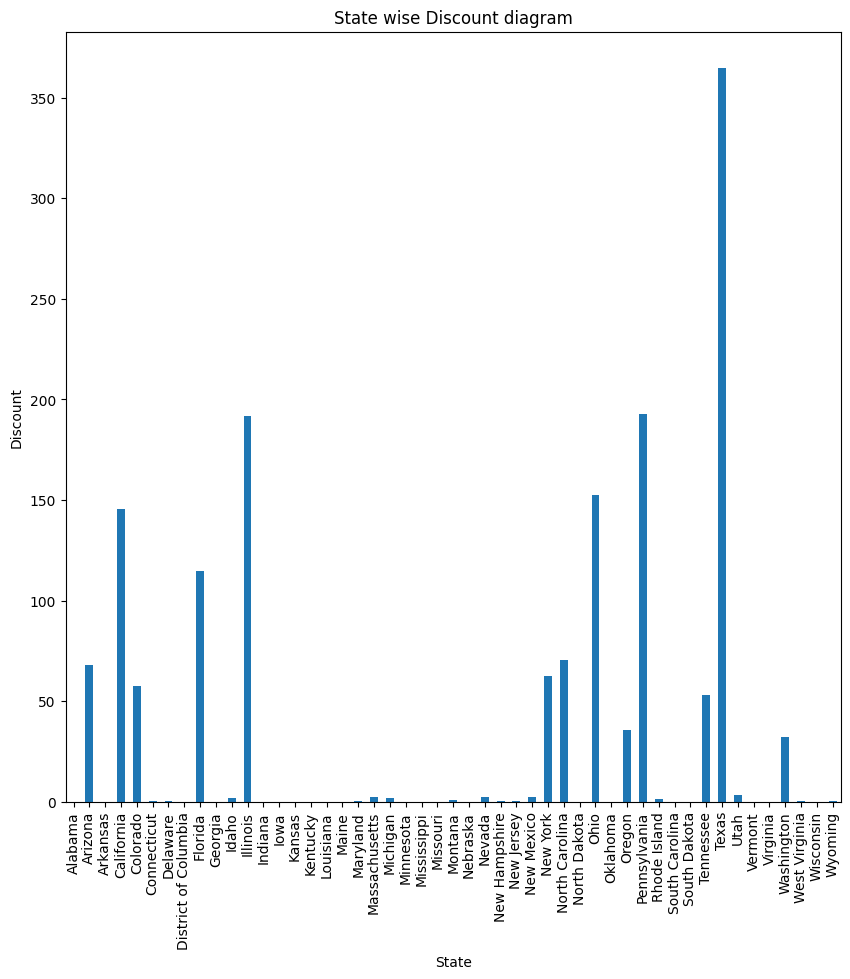

In [ ]:
State_Discount=df.groupby(["State"])["Discount"].sum()

plt.figure(figsize=(10,10))
State_Discount.plot.bar()
plt.title("State wise Discount diagram")
plt.ylabel("Discount")

we can significantly see that 'Texas' state got more discount so there profit is less. and also see that some state did not got any discount.

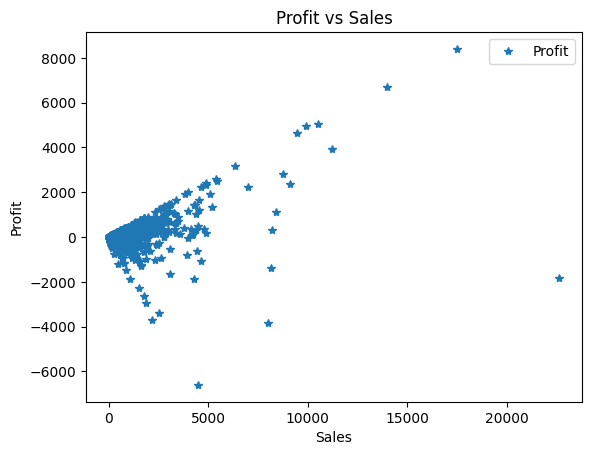

In [ ]:
df.plot(x="Sales",y="Profit",style='*')
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


From the above diagram we can say that when sales increase in that time profit also increase in maximum situation but also see that in some case is going oppositely...and there was only one case when sales huge amount but making loss.

Text(0, 0.5, 'Profit')

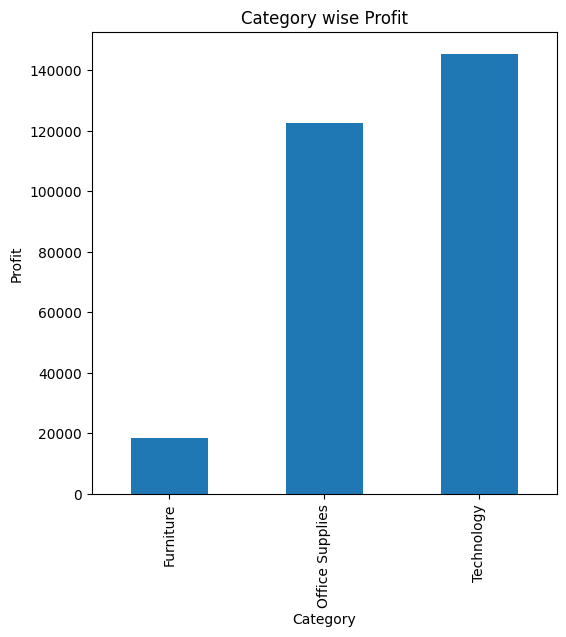

In [ ]:
cat_profit=df.groupby(["Category"])["Profit"].sum()

plt.figure(figsize=(6,6))
cat_profit.plot.bar()
plt.title("Category wise Profit")
plt.ylabel("Profit")

'technology' profit is greater than other.

Text(0, 0.5, 'Discount')

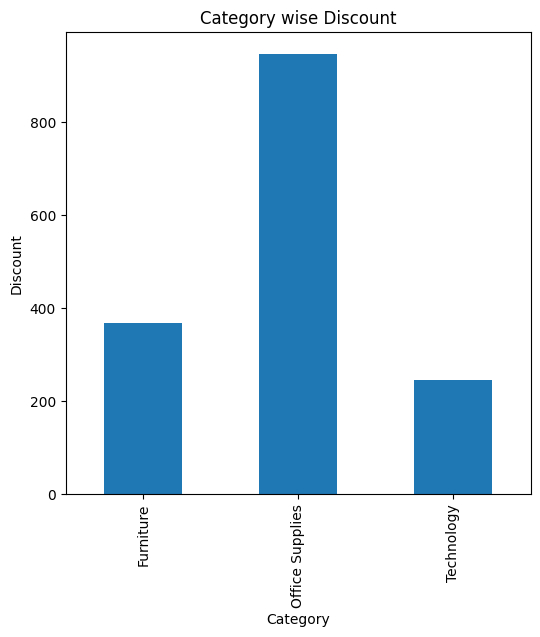

In [ ]:
cat_Discountt=df.groupby(["Category"])["Discount"].sum()

plt.figure(figsize=(6,6))
cat_Discountt.plot.bar()
plt.title("Category wise Discount")
plt.ylabel("Discount")

from the avove two diagram we can say that Office supplies sales in high and got discount huge amount so from that category we go low profit. But at the same time we say that Technology got low discount so make huge profit.

In [ ]:
cat2=df.groupby(['Region', 'Category']).size().unstack()
cat2

Category,Furniture,Office Supplies,Technology
Region,,,
Central,481,1422,420
East,601,1712,535
South,332,995,293
West,707,1897,599


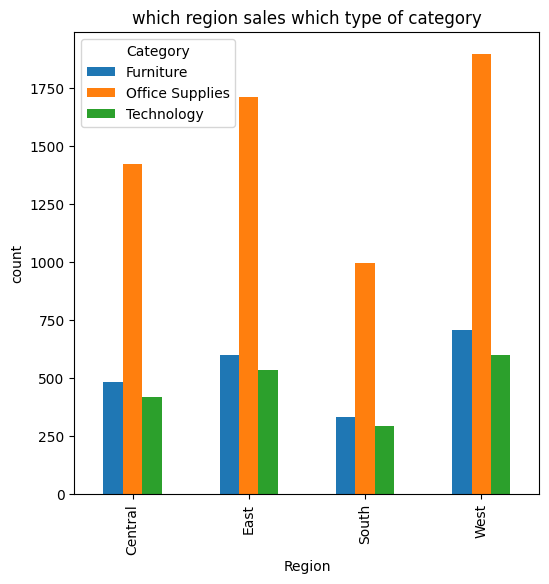

In [ ]:
cat2.plot.bar(figsize=(6,6))
plt.title("which region sales which type of category")
plt.ylabel("count")
plt.show()

for all region 'office supplies item sale is greater than other category.

In [ ]:
cat2=df.groupby(['State', 'Category']).size().unstack()
cat2

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,11.0,36.0,14.0
Arizona,49.0,127.0,48.0
Arkansas,9.0,36.0,15.0
California,444.0,1198.0,359.0
Colorado,51.0,96.0,35.0
Connecticut,13.0,58.0,11.0
Delaware,18.0,58.0,20.0
District of Columbia,3.0,6.0,1.0
Florida,85.0,229.0,69.0


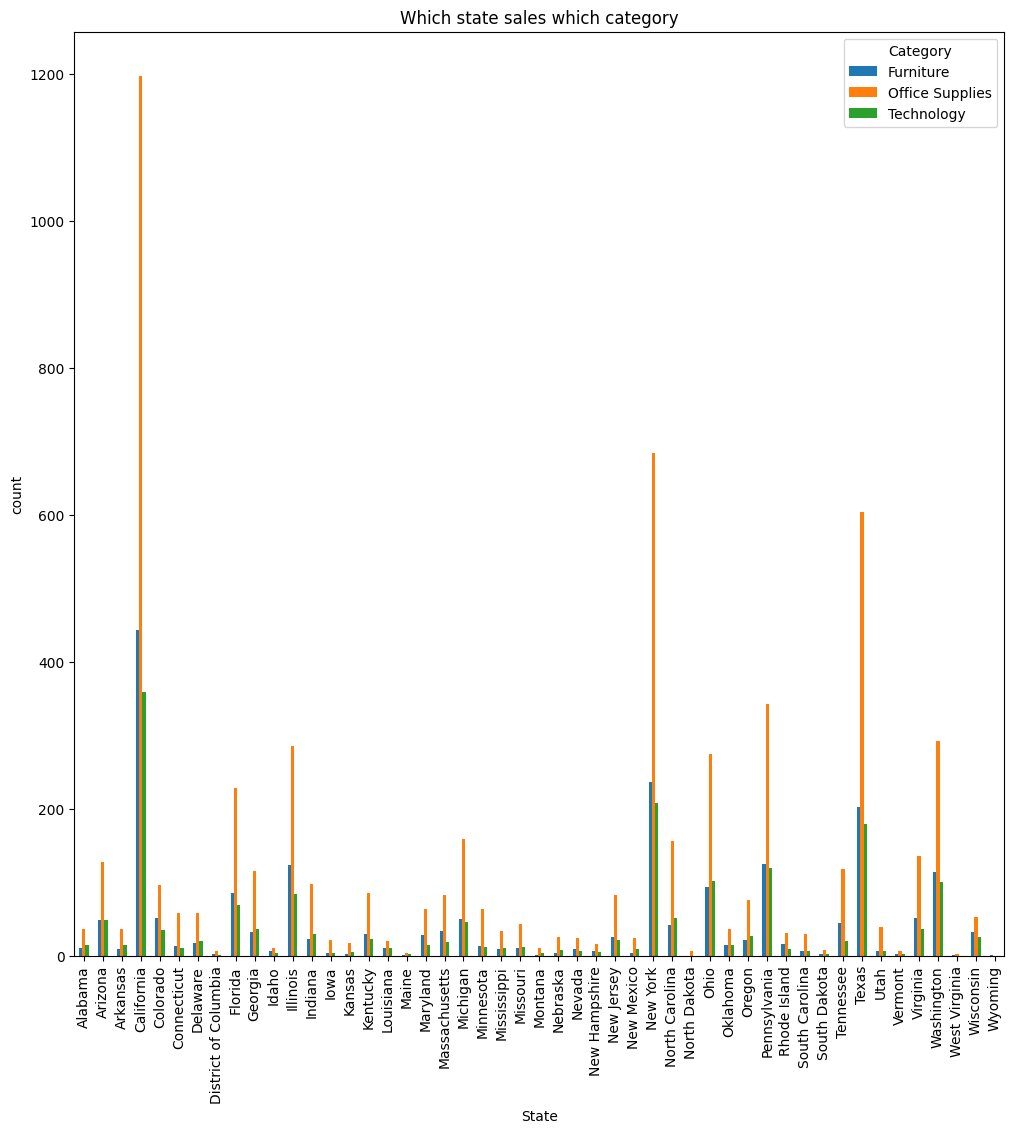

In [ ]:
cat2.plot.bar(figsize=(12,12))
plt.title("Which state sales which category")
plt.ylabel("count")
plt.show()

CONCLUSION:

1. 'California' and 'New York' State has maximum profit and amount of sales. 'Texas' state has lost more amount of money but sales amount is greater.


2. 'North Dakota' state amount of sales is below 1000 and does not make any profit.

3. 'West' region has maximum profit and 'Central' region has low profit.

4. Near 9 states lost money that are Texas,Arizona, Coloroda,Florida,Illinois, North California, Ohio, Pennsylvania, Tennessee.

5. 'Central' region sales is greater than 'South' region but profit is greater in 'South' region. so we interpret that in central region have some business issues. Actuall we see that Texas state make maximum loss so that central region's profit going low.

6. Technology sales is less than other category but from technology category we gain more profit. 

From the overall analysis, we can say that, we can improve 'Texas' , 'Illinois' state business strategy which are all from central region.

Also we can say that if we make low discount in 'Office Supplies' category then we gain more profit than now.